<a href="https://colab.research.google.com/github/wr0124/dl_data_visualization_2023/blob/main/Julie_01__practical_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Exercises

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Reading the dataset

In [ ]:
url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,...,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,...,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,...,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9


# Exercise - Descriptive analysis

Answer the question: **What programming languages are ​​associated with the best salaries?**

For it:
1. Select the relevant columns to `salary_monthly_NET`, `work_contract_type`, `tools_programming_language`, and `profile_studies_level`.
2. Select the relevant rows to analyze. This includes removing extreme and erroneous values, but you can also focus the analysis on a sub-population. For example, they can be limited to people with a salary greater than 10,000 pesos or people who work only "Full-Time" or with a certain programming language, but you must justify your choice and reformulate the initial question if necessary.
  * Get a list of the most popular programming languages. Then, decide how many and which ones to select to include in the analysis.
3. Select metrics that help answer the question and methods to analyze them. Choose ONE of the following options:
  * Compare salary distributions for each language using visualizations. As the visualization is the final product, it must be clear and show relevant information.
  * Compare measures of descriptive statistics on salary distribution for each language. Be creative. Descriptive statistics allow us to say things like: "Kotlin programmers mostly earn the top 10% of salaries!" (where *majority* is a slippery middle ground that just means more than 50%). To compare multiple languages, we recommend using visualizations as well.
  * Compare odds. For example: "If you know Python or Java, you have a 30% more chance of winning over 100K".

If you consider it necessary, carry out several iterations. That is, if they find that the distributions of the programming languages ​​they initially selected are not very different, they can redo the analysis using only the programming languages ​​that are different.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages',
                    'salary_monthly_NET',
                    'work_contract_type',
                    'profile_studies_level']

### Frequency count of programming languages

The column that contains information about the programming languages used is `tools_programming_languages`. Its values are strings with the selected languages separated by commas.

In [ ]:
df.tools_programming_languages[:3]

0                        None
1    HTML, Javascript, Python
2                        None
Name: tools_programming_languages, dtype: object

The following code cells separate these programming languages and count how often they appear.

It is not necessary to understand this code in depth, although it is a good exercise.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'None of the previous one' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('none of the previous one', '') \
    .replace('none', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."


In the `programming_language` column, you will find each language separately. Note that if a response contained 3 languages, such as `"HTML, Javascript, Python"`, the row has been replicated 3 times. Therefore, there are three rows with index 1.

## Relevant language filtering

The following code allows you to select only the rows where the value of the `programming_language` column is found in the `interesting_languages` list.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python", "javascript"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,profile_studies_level,cured_programming_languages
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,University,"[css, html, javascript, sql, typescript]"
...,...,...,...,...,...,...
6087,python,Python,120000.0,Full-Time,University,[python]
6089,python,"Bash/Shell, Python, SQL",130000.0,Full-Time,University,"[bash/shell, python, sql]"
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,Terciary,"[.net, c#, cobol, css, html, javascript, php, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,Terciary,"[c, c++, html, java, javascript, php, python, ..."


## ***my test***

In [ ]:
df=df_lang.drop(columns=["tools_programming_languages","cured_programming_languages"])
print( df.head() )
print( df["programming_language"].value_counts().sort_values(ascending=False) )
print( df.salary_monthly_NET.describe() )
print( df.work_contract_type.value_counts() )
print( df.profile_studies_level.value_counts() )

  programming_language  salary_monthly_NET work_contract_type  \
1                 html             63000.0          Full-Time   
1           javascript             63000.0          Full-Time   
1               python             63000.0          Full-Time   
3           bash/shell            102000.0          Full-Time   
3                    c            102000.0          Full-Time   

  profile_studies_level  
1            University  
1            University  
1            University  
3          Postgraduate  
3          Postgraduate  
javascript    2513
sql           2154
html          1861
python        1475
java          1453
              ... 
lenguaje!        1
jbase            1
tal              1
siebel           1
infobasic        1
Name: programming_language, Length: 207, dtype: int64
count    1.706400e+04
mean     1.004756e+05
std      1.054180e+05
min      1.000000e+00
25%      5.400000e+04
50%      8.000000e+04
75%      1.100000e+05
max      2.080000e+06
Name: salary_m

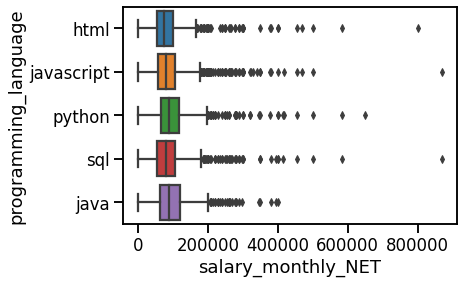

In [ ]:
program_interesting=["javascript","sql","html" ,"python", "java"]
df_filter=df[ (df["work_contract_type"]=="Full-Time") & (df["profile_studies_level"]=="University") ]
 
df_prog=df_filter[df_filter.programming_language.isin(program_interesting)]
import seaborn as sns
sns.boxplot(data=df_prog, x="salary_monthly_NET", y="programming_language")

  programming_language  salary_monthly_NET work_contract_type  \
1                 html             63000.0          Full-Time   
1           javascript             63000.0          Full-Time   
1               python             63000.0          Full-Time   
4                 html            106000.0          Full-Time   
4           javascript            106000.0          Full-Time   

  profile_studies_level  
1            University  
1            University  
1            University  
4            University  
4            University  
                      salary_monthly_NET
programming_language                    
html                        85007.907939
java                        97281.087022
javascript                  90062.843072
python                     100693.933310
sql                         87664.545406


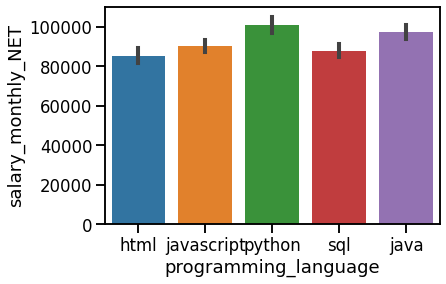

In [ ]:
print( df_prog.head() )
print( df_prog.groupby("programming_language").mean() )
sns.barplot(data=df_prog, x="programming_language", y="salary_monthly_NET")

In [ ]:
avg_sal_

## **soulution de prof**

## Solutions

First, let's analyze the three steps to make an analysis.

**Step 1**: Define our main question, in this case: **What programming languages are ​​associated with the best salaries?**

**Step 2**: Select possible relevant columns which might help to answer the questions.

**Step 3**: Prepare experiment using visualizations.

We already have steps 1 and 2, given by the exercise and the code provided above. The dataframe `df_lang` contains the necessary columns we will be using: `salary_monthly_NET`, `work_contract_type`, `programming_language`, and `profile_studies_level`.

In [ ]:
df_lang

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,University,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,Terciary,"[c, c++, html, java, javascript, php, python, ..."


We remove `tools_programming_language` and `cured_programming_language` as we are not going to use them.

In [ ]:
df_lang = df_lang.drop(columns=["tools_programming_languages", "cured_programming_languages"])

In [ ]:
df_lang

,programming_language,salary_monthly_NET,work_contract_type,profile_studies_level
1,html,63000.0,Full-Time,University
1,javascript,63000.0,Full-Time,University
1,python,63000.0,Full-Time,University
3,bash/shell,102000.0,Full-Time,Postgraduate
3,c,102000.0,Full-Time,Postgraduate
...,...,...,...,...
6093,java,72.0,Full-Time,Terciary
6093,javascript,72.0,Full-Time,Terciary
6093,php,72.0,Full-Time,Terciary
6093,python,72.0,Full-Time,Terciary


## Option 1:

Let's try comparing salary distributions for each language using visualizations. First, we can check how many languages we have in our dataset.

In [ ]:
df_lang["programming_language"].nunique()

207

In [ ]:
df_lang["programming_language"].value_counts()

javascript    2513
sql           2154
html          1861
python        1475
java          1453
              ... 
powercli         1
boomi            1
dell             1
x++              1
infobasic        1
Name: programming_language, Length: 207, dtype: int64

Also, some languages only have one instance. Such is the case of `infobasic`, `x++`, `dell`, among others. In addition, analyzing distribution with not enough samples leads to high variance. So we can compare the salary distributions with the 5 most programming languages.

In [ ]:
most_used_langs = (
    df_lang.programming_language
    .value_counts()
    .sort_values(ascending=False)
    .head(5)
)

In [ ]:
most_used_langs

javascript    2513
sql           2154
html          1861
python        1475
java          1453
Name: programming_language, dtype: int64

In [ ]:
most_used_langs.index

Index(['javascript', 'sql', 'html', 'python', 'java'], dtype='object')

In [ ]:
interesting_languages = most_used_langs.index
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang

,programming_language,salary_monthly_NET,work_contract_type,profile_studies_level
1,html,63000.0,Full-Time,University
1,javascript,63000.0,Full-Time,University
1,python,63000.0,Full-Time,University
3,html,102000.0,Full-Time,Postgraduate
3,java,102000.0,Full-Time,Postgraduate
...,...,...,...,...
6093,html,72.0,Full-Time,Terciary
6093,java,72.0,Full-Time,Terciary
6093,javascript,72.0,Full-Time,Terciary
6093,python,72.0,Full-Time,Terciary


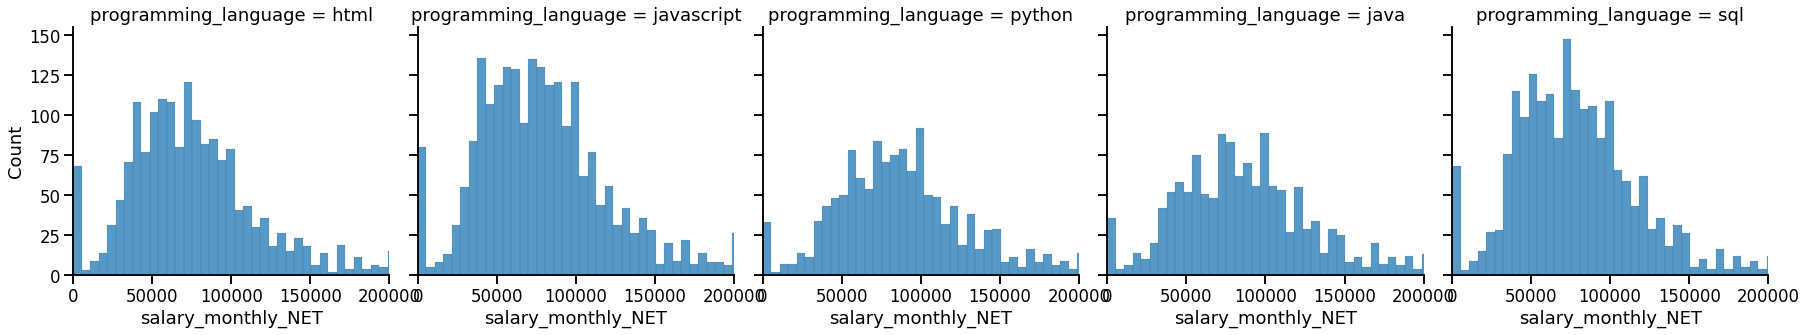

In [ ]:
seaborn.displot(data=filtered_df_lang.reset_index(), x="salary_monthly_NET", col="programming_language")
plt.xlim(0, 200000)
plt.savefig("displots_for_each_lang.png")

Each of the 5 most used programming languages distributes similarly, where the majority of them earn between $40000 and $100000.

## Option 2:

Compare measures of descriptive statistics on salary distribution for each language.

We can make a barplot with the mean for each programming language.

In [ ]:
filtered_df_lang

,programming_language,salary_monthly_NET,work_contract_type,profile_studies_level
1,html,63000.0,Full-Time,University
1,javascript,63000.0,Full-Time,University
1,python,63000.0,Full-Time,University
3,html,102000.0,Full-Time,Postgraduate
3,java,102000.0,Full-Time,Postgraduate
...,...,...,...,...
6093,html,72.0,Full-Time,Terciary
6093,java,72.0,Full-Time,Terciary
6093,javascript,72.0,Full-Time,Terciary
6093,python,72.0,Full-Time,Terciary


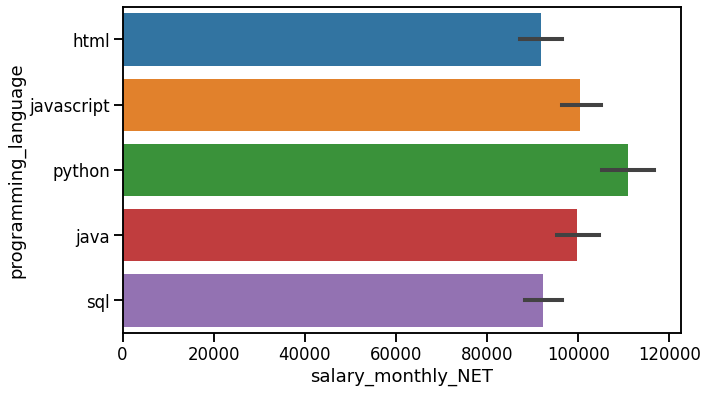

In [ ]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=filtered_df_lang, x="salary_monthly_NET", y="programming_language")
plt.savefig("barplots_for_lang.png")

Here we can say that, on average, the people who use the 5 most common programming languages earn over $80000.

## Option 3:

The third option is using probabilities. Let's suppose that $L_{i}$ is one of the 5 most used programming languages. Let's calculate the conditional probability of earning more than $50000 if you use $L_{i}$, that is, $P(A|L_{i})$.

$$P(> \$50000 |L_{i}) = \frac{P(> \$50000 \cap L_{i})}{P(L_{i})}$$

This is equivalent to:

$$P(> \$50000|L_{i}) = \frac{|> \$50000 \cap L_{i}|}{|L_{i}|}$$


In [ ]:
is_above_50000 = df_lang["salary_monthly_NET"] > 50000
uses_python = df_lang["programming_language"] == "python"

intersection_count = len(df_lang[is_above_50000 & uses_python])

In [ ]:
intersection_count / len(df_lang[uses_python])

0.8108474576271186

## Other things to work out

What can we do with the other two columns, `work_contract_type`, and `profile_studies_level`? We might restrict our question by only considering in our analysis people who have a full-time contract type or with a university degree. This might make the comparison fairer and avoid introducing any biases.

In [ ]:
df_lang["profile_studies_level"] == "University"

1        True
1        True
1        True
3       False
3       False
        ...  
6093    False
6093    False
6093    False
6093    False
6093    False
Name: profile_studies_level, Length: 17702, dtype: bool

In [ ]:
df_lang[(df_lang["work_contract_type"] == "Full-Time") & (df_lang["profile_studies_level"] == "University")]

,programming_language,salary_monthly_NET,work_contract_type,profile_studies_level
1,html,63000.0,Full-Time,University
1,javascript,63000.0,Full-Time,University
1,python,63000.0,Full-Time,University
4,css,106000.0,Full-Time,University
4,html,106000.0,Full-Time,University
...,...,...,...,...
6086,sql,82000.0,Full-Time,University
6087,python,120000.0,Full-Time,University
6089,bash/shell,130000.0,Full-Time,University
6089,python,130000.0,Full-Time,University


In [ ]:
filtered_df_lang = filtered_df_lang[
    (filtered_df_lang["work_contract_type"] == "Full-Time") &
    (filtered_df_lang["profile_studies_level"] == "University")
]

In [ ]:
filtered_df_lang

,programming_language,salary_monthly_NET,work_contract_type,profile_studies_level
1,html,63000.0,Full-Time,University
1,javascript,63000.0,Full-Time,University
1,python,63000.0,Full-Time,University
4,html,106000.0,Full-Time,University
4,javascript,106000.0,Full-Time,University
...,...,...,...,...
6086,python,82000.0,Full-Time,University
6086,sql,82000.0,Full-Time,University
6087,python,120000.0,Full-Time,University
6089,python,130000.0,Full-Time,University


Once the filtering is done, we can perform the same experiments we did above.

<AxesSubplot:xlabel='salary_monthly_NET', ylabel='programming_language'>

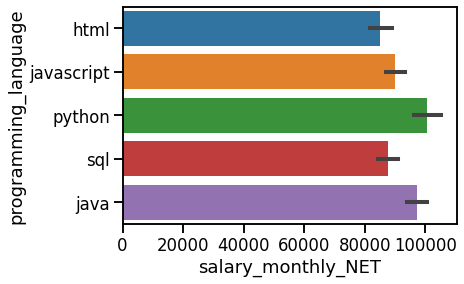

In [ ]:
seaborn.barplot(data=filtered_df_lang.reset_index(), x="salary_monthly_NET", y="programming_language")

Other cool things we can do with visualization!

How many world cup figure packages do we need to buy until obtaining a Messi's card?

https://www.linkedin.com/feed/update/urn:li:activity:6968668384691433472?utm_source=share&utm_medium=member_desktop